In [44]:
import tensorflow as tf
import os

In [45]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [46]:
gpus

[]

In [47]:
import cv2
import imghdr

In [48]:
data_dir = 'data'
os.listdir(data_dir)

['.DS_Store', 'happy_faces', 'sad_faces']

In [49]:
image_exts = ['jpeg','jpg','bmp','png']

In [50]:


for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):  # Check if it's a directory
        for image in os.listdir(image_class_path):
            print(image)


AF2bZyhCXlNwVIdE05IWIvWDpU616mcbBJIQbe_MKyklcZjEEQ-s64-c-mo.png
images (2).jpeg
images (4).jpeg
images.jpeg
ACg8ocI3pOuafuvr3kg-9x9nUtbncALkqbvtE9eJs4BV1REecmFskA-s48-c.png
ACg8ocIM2hYxJXeirY3Ccr9xBfmrPGTOwVeANQNhIx1LyJ59pMA1Cg-s128-.png
image (8).jpeg
images (1).jpeg
images (3).jpeg
image (9).jpeg
ACg8ocIM2hYxJXeirY3Ccr9xBfmrPGTOwVeANQNhIx1LyJ59pMA1Cg-s83-c.png
checkmark.png
AF2bZyhCXlNwVIdE05IWIvWDpU616mcbBJIQbe_MKyklcZjEEQ-s32-c-mo.png
photo.jpg
image (7).jpeg
image (13).jpeg
image (11).jpeg
image (5).jpeg
image (1).png
image.jpeg
image (15).jpeg
image (1).jpeg
image (3).jpeg
image (17).jpeg
image (4).jpeg
image (10).jpeg
image (12).jpeg
image (6).jpeg
image (16).jpeg
image (2).jpeg
ACg8ocIM2hYxJXeirY3Ccr9xBfmrPGTOwVeANQNhIx1LyJ59pMA1Cg-s192-.png
image.png
p_2x_eb7895ba582f.png
image (14).jpeg
AF2bZyhCXlNwVIdE05IWIvWDpU616mcbBJIQbe_MKyklcZjEEQ-s64-c-mo.png
images (2).jpeg
images.jpeg
ACg8ocIM2hYxJXeirY3Ccr9xBfmrPGTOwVeANQNhIx1LyJ59pMA1Cg-s128-.png
image (8).jpeg
images (1).jpeg
imag

In [51]:
img = cv2.imread(os.path.join('data', 'data/happy_faces/photo.jpg'))
if img is None:
    print("Image not found or cannot be opened.")
else:
    print("Image loaded successfully.")



Image not found or cannot be opened.


[ WARN:0@1261.500] global loadsave.cpp:241 findDecoder imread_('data/data/happy_faces/photo.jpg'): can't open/read file: check file path/integrity


In [52]:
import numpy as np
img


In [53]:
img = cv2.imread(os.path.join('data','happy_faces','image (3).jpeg'))

In [54]:
img.shape

(46, 69, 3)

In [57]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):  # Check if it's a directory
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue in the image: {}'.format(image_path))


In [59]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data')

Found 62 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
data_iterator

In [7]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [9]:
len(batch)

2

In [16]:
batch[1]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

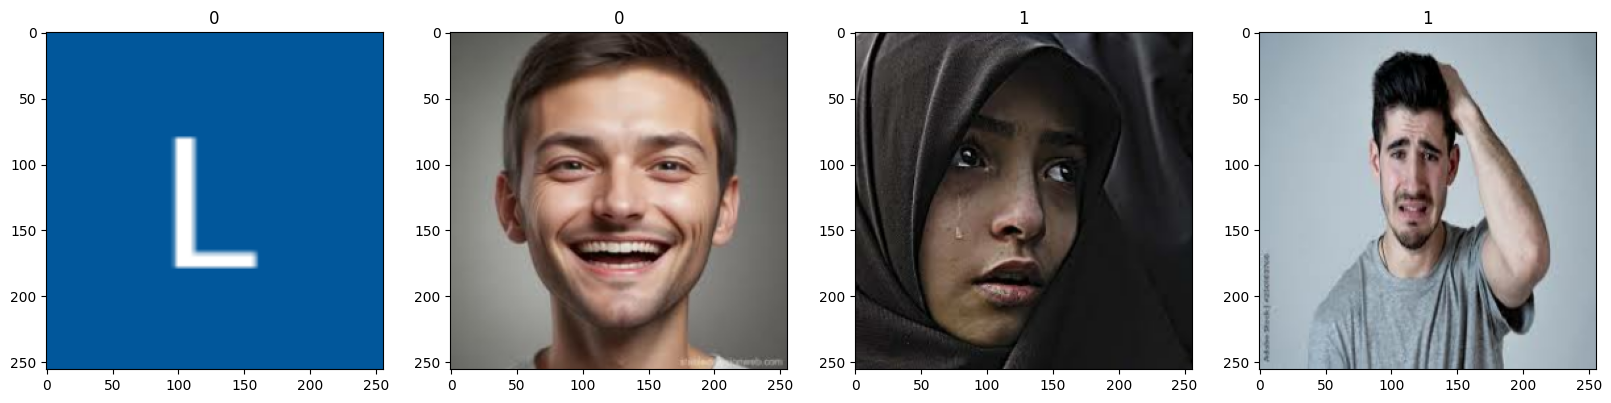

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])